<a href="https://colab.research.google.com/github/ankesh86/DiffusionModels/blob/main/InteractDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.3 MB/s eta 0:00:00


In [2]:
# Import libraries
from diffusers import DiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
# Load the diffusion pipeline with your pretrained model
pipeline = DiffusionPipeline.from_pretrained(
    "interactdiffusion/diffusers-v1-2",
    trust_remote_code=True,
    variant="fp16", torch_dtype=torch.float16
)


model_index.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

(…)ne_stable_diffusion_interactdiffusion.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

(…)t/interactdiffusion_unet_2d_condition.py:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by StableDiffusionInteractDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
# Ensure the pipeline runs on GPU (if available)
pipeline = pipeline.to("cuda")

In [9]:
# Run the pipeline with specified prompts and settings
images = pipeline(
    prompt="a baby is playing in water",
    interactdiffusion_subject_phrases=["baby"],
    interactdiffusion_object_phrases=["water"],
    interactdiffusion_action_phrases=["playing"],
    interactdiffusion_subject_boxes=[[0.0332, 0.1660, 0.3359, 0.7305]],
    interactdiffusion_object_boxes=[[0.2891, 0.4766, 0.6680, 0.7930]],
    interactdiffusion_scheduled_sampling_beta=1,
    output_type="pil",
    num_inference_steps=50,
).images


  0%|          | 0/50 [00:00<?, ?it/s]

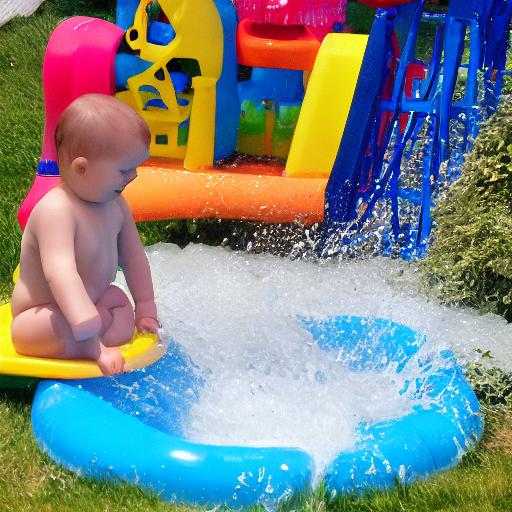

In [10]:
# Save and display the generated image
images[0].save('out.jpg')

# Display the image directly in Colab
from PIL import Image
from IPython.display import display

display(Image.open('out.jpg'))